**GENEL BAKIŞ**

Veri setini ele aldığımız zaman farkettiğimiz ilk şey çıkardığımız submission dosyasının belirli bir 'Accuracy Score' aralığına sıkışıp kaldığı 
oldu. Bu yüzden oluşturduğumuz modelin mantıksal olarak kod ve işlem sırası aşağıdaki gibi olacak:
1) İlk submission dosyasının elde edilmesi, 
2) Veri manipülasyonu ve zenginleştirilmesi,
3) Zenginleştirilen ve manipüle edilmiş verilerin tekrardan işlenmesi, 
4) Sonuç
olarak 4 aşamada ele alınacak, başlayalım.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_x.csv')

Test ve Train verilerine genel bir bakış.

In [3]:
test_df.head()

index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0      0    Erkek     51-60         Evli  Yüksek Lisans Mezunu   
1      1    Erkek     41-50        Bekar           Lise Mezunu   
2      2    Kadın       >60         Evli             Eğitimsiz   
3      3    Kadın     51-60         Evli         Doktora Ötesi   
4      4    Erkek     18-30         Evli  Yüksek Lisans Mezunu   

                  İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var          365331.930346  Köy veya Kasaba   
1  İşsiz veya Düzenli Bir İşi Yok          414899.236174      Büyük Şehir   
2  İşsiz veya Düzenli Bir İşi Yok          152825.872271      Küçük Şehir   
3  Düzenli ve Ücretli Bir İşi Var          489052.908472  Köy veya Kasaba   
4             Kendi İşinin Sahibi          323635.711534      Küçük Şehir   

  En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0                         Giyim                         5566.587664   
1              Spor Malzemeleri                         6756.766203   
2                         Giyim                         4493.915682   
3                      Kozmetik                        42670.646595   
4                         Giyim                         5959.266948   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                   15.442635                   Etmiyor   
1                                   14.957246                   Etmiyor   
2                                   10.907930                   Etmiyor   
3                                   32.333021                   Etmiyor   
4                                    4.519968                   Etmiyor   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  
0                                 19.646460  
1                                 19.675863  
2                                 46.904518  
3                                 48.083609  
4                                 12.752491

In [4]:
train_df.head(10)

index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0      0    Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1      1    Erkek       >60         Evli           Lise Mezunu   
2      2    Erkek     18-30        Bekar           Lise Mezunu   
3      3    Erkek     51-60         Evli           Lise Mezunu   
4      4    Erkek     31-40         Evli       Ortaokul Mezunu   
5      5    Kadın     18-30        Bekar     Yüksekokul Mezunu   
6      6    Kadın     18-30         Evli           Lise Mezunu   
7      7    Kadın     31-40        Bekar           Lise Mezunu   
8      8    Erkek     51-60        Bekar     Üniversite Mezunu   
9      9    Kadın     51-60         Evli     Üniversite Mezunu   

                  İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var          748266.440879      Büyük Şehir   
1             Kendi İşinin Sahibi          246298.609605      Küçük Şehir   
2  Düzenli ve Ücretli Bir İşi Var          268582.732360      Küçük Şehir   
3             Kendi İşinin Sahibi          327721.837865           Kırsal   
4  İşsiz veya Düzenli Bir İşi Yok          397431.626948      Büyük Şehir   
5  Düzenli ve Ücretli Bir İşi Var          332489.316371      Büyük Şehir   
6  Düzenli ve Ücretli Bir İşi Var          256538.898810           Kırsal   
7             Kendi İşinin Sahibi          213630.355636      Küçük Şehir   
8  Düzenli ve Ücretli Bir İşi Var          479593.473447  Köy veya Kasaba   
9                          Emekli          477359.775587      Küçük Şehir   

      En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0  Elektronik ve Teknolojik Ürünler                        32010.900881   
1                  Spor Malzemeleri                         4145.729891   
2                             Giyim                         9924.379414   
3                             Giyim                         6417.780714   
4                             Giyim                         7886.663061   
5                             Giyim                         9218.994557   
6                     Ev ve Mobilya                         6013.405491   
7                     Ev ve Mobilya                         3960.361517   
8  Elektronik ve Teknolojik Ürünler                        39574.601258   
9                             Giyim                        41555.832293   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                   37.310644                   Etmiyor   
1                                   11.554851                   Etmiyor   
2                                   55.353236                    Ediyor   
3                                   15.417239                   Etmiyor   
4                                   14.689837                   Etmiyor   
5                                   56.626868                   Etmiyor   
6                                   15.929857                   Etmiyor   
7                                    8.913887                   Etmiyor   
8                                   25.685715                   Etmiyor   
9                                   27.871027                   Etmiyor   

  Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
0    obek_4                                102.936904  
1    obek_5                                 82.176053  
2    obek_8                                141.661426  
3    obek_3                                 17.097397  
4    obek_3                                 20.470459  
5    obek_8                                216.332207  
6    obek_3                                 19.248434  
7    obek_5                                102.394323  
8    obek_3                                 56.322893  
9    obek_6                                 44.838758

Eksik verimiz yok. Satır ve sütunlarımızın tamamı dolu.

In [5]:
train_df.isna().sum()

index                                         0
Cinsiyet                                      0
Yaş Grubu                                     0
Medeni Durum                                  0
Eğitim Düzeyi                                 0
İstihdam Durumu                               0
Yıllık Ortalama Gelir                         0
Yaşadığı Şehir                                0
En Çok İlgilendiği Ürün Grubu                 0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Eğitime Devam Etme Durumu                     0
Öbek İsmi                                     0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
dtype: int64

In [6]:
test_df.isna().sum()

index                                         0
Cinsiyet                                      0
Yaş Grubu                                     0
Medeni Durum                                  0
Eğitim Düzeyi                                 0
İstihdam Durumu                               0
Yıllık Ortalama Gelir                         0
Yaşadığı Şehir                                0
En Çok İlgilendiği Ürün Grubu                 0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Eğitime Devam Etme Durumu                     0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
dtype: int64

Öbeklerimizde sayısal olarak bir yığılma olup olmadığını kontrol ettik.

In [7]:
train_df['Öbek İsmi'].value_counts()

obek_4    720
obek_8    717
obek_5    706
obek_3    695
obek_7    695
obek_1    692
obek_6    688
obek_2    547
Name: Öbek İsmi, dtype: int64

Train ve Test verilerimizin genel olarak sütunlarının istatistiksel özetine bakTIK. İki veri setimizde de 0 olan değerler var.

In [8]:
train_df.describe()

index  Yıllık Ortalama Gelir  Yıllık Ortalama Satın Alım Miktarı  \
count  5460.000000           5.460000e+03                         5460.000000   
mean   2729.500000           3.635711e+05                        16616.612217   
std    1576.310566           2.197144e+05                        14099.171704   
min       0.000000           4.392299e+04                         2859.254000   
25%    1364.750000           2.156934e+05                         4931.859057   
50%    2729.500000           2.869254e+05                         8426.818967   
75%    4094.250000           4.681882e+05                        30579.244695   
max    5459.000000           1.192437e+06                        48605.594415   

       Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
count                                 5460.000000   
mean                                    24.040884   
std                                     14.945655   
min                                      0.000000   
25%                                     11.550502   
50%                                     20.095924   
75%                                     35.918161   
max                                     64.616196   

       Yıllık Ortalama Sepete Atılan Ürün Adedi  
count                               5460.000000  
mean                                  73.445693  
std                                   47.214184  
min                                    3.977559  
25%                                   25.009168  
50%                                   82.485579  
75%                                  104.473291  
max                                  242.308441

In [9]:
test_df.describe()

index  Yıllık Ortalama Gelir  Yıllık Ortalama Satın Alım Miktarı  \
count  2340.000000           2.340000e+03                         2340.000000   
mean   1169.500000           3.622524e+05                        16674.303935   
std     675.644137           2.232063e+05                        14266.101056   
min       0.000000           8.065675e+04                         2870.657175   
25%     584.750000           2.120081e+05                         4807.074240   
50%    1169.500000           2.836947e+05                         8186.095300   
75%    1754.250000           4.669887e+05                        30747.419142   
max    2339.000000           1.229399e+06                        46380.542188   

       Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
count                                 2340.000000   
mean                                    23.465787   
std                                     14.559035   
min                                      0.000000   
25%                                     11.336283   
50%                                     20.094319   
75%                                     33.431156   
max                                     64.017477   

       Yıllık Ortalama Sepete Atılan Ürün Adedi  
count                               2340.000000  
mean                                  72.078920  
std                                   46.311708  
min                                    5.283642  
25%                                   24.383782  
50%                                   71.033886  
75%                                  104.202802  
max                                  237.768581

Son aşamada 'submission2.csv' dosyasını oluştururken 'index'leri kullanacağımız için submissin_ids işimize yarayacak.

In [10]:
submission_ids = test_df['index']

Veriyi incelediğimizde "İndex" kolonlarının gereksiz olduğunu fark ettik

In [11]:
# Index kolonunu verilerimizden atıyoruz.
train_df.drop(columns=['index'], inplace=True)
test_df.drop(columns=['index'], inplace=True)

Sütun grafikleri ile kolonlardaki özelliklere göre öbeklerin dağılımına göz atıyoruz.

In [12]:
categorical_features = ['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi', 'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu']
numerical_features = ['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']

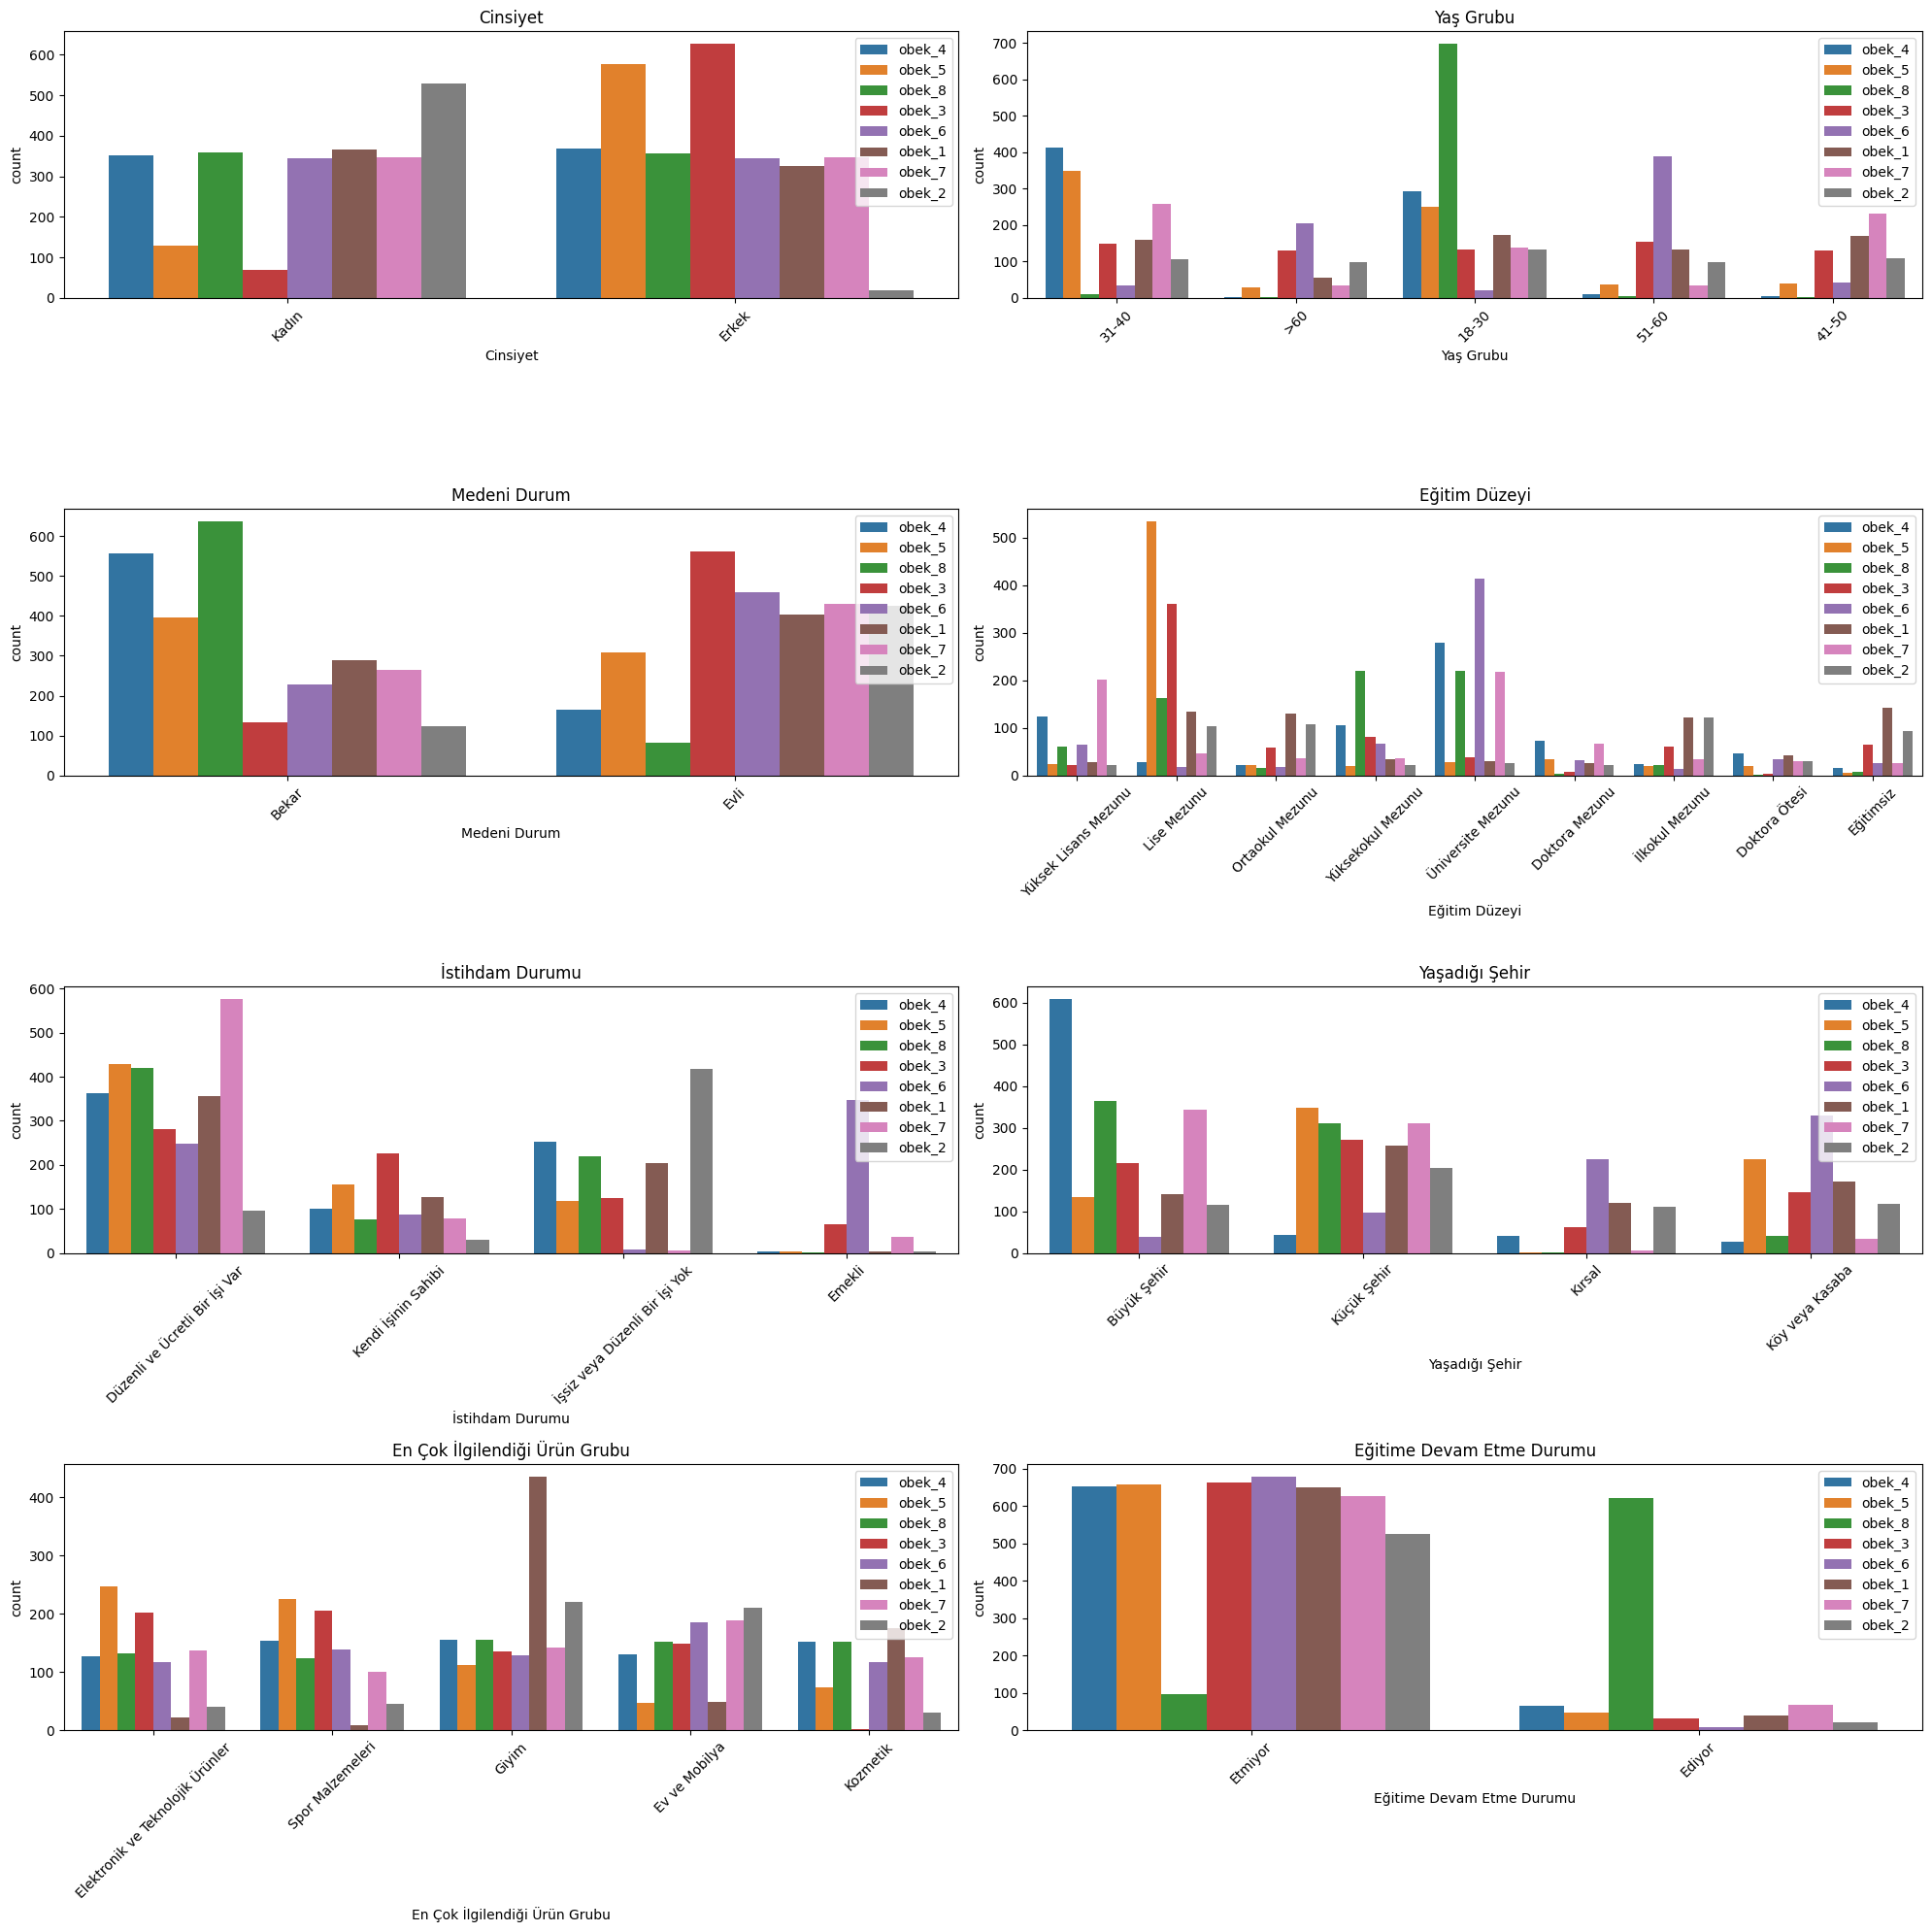

In [13]:
plt.figure(figsize=(20, 20))

n_rows = (len(categorical_features) + 1) // 2

for idx, feature in enumerate(categorical_features, 1):
    plt.subplot(n_rows, 2, idx)
    sns.countplot(data=train_df, x=feature, hue='Öbek İsmi')
    plt.title(feature)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Bu kod (**LabelEncoder**), makine öğrenimi modellerine girdi olarak verilecek verilerin hazırlanmasını sağlar. Kategorik özelliklerin sayısal formata dönüştürülmesi, modellerin bu verilerle daha etkili bir şekilde çalışmasını sağlar. Yani örnek olarak cinsiyet kategorisinde bulunan Kadın ve Erkekleri 0 ve 1 olarak numaralandırır.

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# Her bir kategorik özelliğe bir LabelEncoder atanması
label_encoders = {}

for column in categorical_features:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    label_encoders[column] = le  

In [16]:
# Aynı işlemi test_df için de yaptık.
label_encoders = {}

for column in categorical_features:
    le = LabelEncoder()
    test_df[column] = le.fit_transform(test_df[column])
    label_encoders[column] = le


Aşağıdaki işlem, makine öğrenimi modellerini eğitirken hedef değişkeni sayısal bir forma dönüştürmek için yapılır. Adım adım basit bir açıklama:

1. `LabelEncoder` sınıfından bir örnek olan `target_encoder` oluşturulur. Bu nesne, kategorik değerleri sayısal değerlere dönüştürmek için kullanılacak.

2. Eğitim veri çerçevesindeki 'Öbek İsmi' sütunu, `target_encoder` ile dönüştürülür. Bu dönüşüm, kategorik değerleri sayısal değerlere eşler. Yani farklı kategorik değerler, farklı sayısal değerlere dönüşür.

Yani eşsiz öbekleri sayısal olarak (1,2,3..) diye numaralandırır, toplamda 8 öbeğimiz olduğu için 8'e kadar öbeklerimiz numaralandırılır.

In [17]:
target_encoder = LabelEncoder()
train_df['Öbek İsmi'] = target_encoder.fit_transform(train_df['Öbek İsmi'])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

`train_test_split` kullanarak veriyi eğitim ve test setlerine ayırdık. Eğitim verimizi %80, test verimizi %20 olarak belirledik. `StandardScaler` kullanarak verimizi belirli bi oranda ölçeklendirdik.

In [19]:
X = train_df.drop('Öbek İsmi', axis=1)
y = train_df['Öbek İsmi'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Eğitim ve test setlerinin boyutlarını kontrol ettik.
print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)

Eğitim verisi boyutu: (4368, 12)
Test verisi boyutu: (1092, 12)


In [20]:
#'StandardScaler' kullanarak test verilerini ölçeklendirdik
test_data_scaled = scaler.transform(test_df)

Verilerin tamamı sayısal olarak numaralandırılmış.

In [21]:
train_df.head()

Cinsiyet  Yaş Grubu  Medeni Durum  Eğitim Düzeyi  İstihdam Durumu  \
0         1          1             0              5                0   
1         0          4             1              3                2   
2         0          0             0              3                0   
3         0          3             1              3                2   
4         0          1             1              4                3   

   Yıllık Ortalama Gelir  Yaşadığı Şehir  En Çok İlgilendiği Ürün Grubu  \
0          748266.440879               0                              0   
1          246298.609605               2                              4   
2          268582.732360               2                              2   
3          327721.837865               3                              2   
4          397431.626948               0                              2   

   Yıllık Ortalama Satın Alım Miktarı  \
0                        32010.900881   
1                         4145.729891   
2                         9924.379414   
3                         6417.780714   
4                         7886.663061   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi  Eğitime Devam Etme Durumu  \
0                                   37.310644                          1   
1                                   11.554851                          1   
2                                   55.353236                          0   
3                                   15.417239                          1   
4                                   14.689837                          1   

   Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
0          3                                102.936904  
1          4                                 82.176053  
2          7                                141.661426  
3          2                                 17.097397  
4          2                                 20.470459

In [22]:
test_df.head()

Cinsiyet  Yaş Grubu  Medeni Durum  Eğitim Düzeyi  İstihdam Durumu  \
0         0          3             1              5                0   
1         0          2             0              3                3   
2         1          4             1              2                3   
3         1          3             1              1                0   
4         0          0             1              5                2   

   Yıllık Ortalama Gelir  Yaşadığı Şehir  En Çok İlgilendiği Ürün Grubu  \
0          365331.930346               1                              2   
1          414899.236174               0                              4   
2          152825.872271               2                              2   
3          489052.908472               1                              3   
4          323635.711534               2                              2   

   Yıllık Ortalama Satın Alım Miktarı  \
0                         5566.587664   
1                         6756.766203   
2                         4493.915682   
3                        42670.646595   
4                         5959.266948   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi  Eğitime Devam Etme Durumu  \
0                                   15.442635                          1   
1                                   14.957246                          1   
2                                   10.907930                          1   
3                                   32.333021                          1   
4                                    4.519968                          1   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  
0                                 19.646460  
1                                 19.675863  
2                                 46.904518  
3                                 48.083609  
4                                 12.752491

***RandomForestClassifier*** modelinde, birden fazla ağaç eğitilir ve sonuçlar ortak bir tahmin olarak birleştirilir.

**n_estimators=100**: 100 karar ağacı oluşturduk.

Model, **X_train** (eğitim özellikleri) ve **y_train** (eğitim hedef değişkeni) verilerini kullanarak eğittik.

**'accuracy_score'** fonksiyonu ile gerçek hedef değerlerle tahmin edilen değerler arasındaki doğruluk oranını hesapladık.

**'classification_report'** fonksiyonu, sınıflandırma sonuçlarını ayrıntılı bir rapor olarak oluşturduk.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_encoder.classes_)

print("Doğruluk:", accuracy)
print("Sınıflandırma Raporu:\n", classification_rep)

Doğruluk: 0.9615384615384616
Sınıflandırma Raporu:
               precision    recall  f1-score   support

      obek_1       0.96      0.95      0.96       135
      obek_2       0.97      0.96      0.96       114
      obek_3       0.97      0.99      0.98       145
      obek_4       0.98      0.93      0.95       134
      obek_5       0.96      0.99      0.97       139
      obek_6       0.94      0.98      0.96       128
      obek_7       0.97      0.94      0.95       148
      obek_8       0.95      0.97      0.96       149

    accuracy                           0.96      1092
   macro avg       0.96      0.96      0.96      1092
weighted avg       0.96      0.96      0.96      1092



Bu kod, test verileri üzerinde daha önce eğitilen **'RandomForestClassifier'** modelini kullanarak tahminler yapar. Yani tahmini öbekleri oluşturur.

In [24]:
test_predictions = clf.predict(test_data_scaled)
test_predictions_labels = target_encoder.inverse_transform(test_predictions)

# İlk submission dosyasını oluşturma

In [25]:
submission_df = pd.DataFrame(
    {'id': submission_ids, 'Öbek İsmi': test_predictions_labels})
submission_df.to_csv('submission1.csv', index=False)

# Veri manipülasyonu ve Zenginleştirilmesi

Yapacağımız veri manipülasyonu ve zenginleştirilmesi işleminin ilk adımı oluşturmuş olduğumuz 'submission1.csv' dosyasının içindeki öbekleri alarak 'test_x.csv' dosyasına eklemek olacak çünkü oluşan 'submission1.csv' dosyasının içinde bulunan tahmini öbekler zaten 'test_df' üzerinden 'test_x.csv' dosyasının öbeklerini tahmin etmek üzere yapıldı, böylelikle elimizde bulunan 'train.csv' dosyasına ek olarak yeni bir 'test_df' üzerinden tahmin yoluyla oluşturulmuş ekstra veriler elde etmiş olacağız.

In [26]:
trainDf = pd.read_csv("train.csv")
testDf = pd.read_csv("test_x.csv")

In [27]:
submission = pd.read_csv("submission1.csv")
subDf = submission["Öbek İsmi"]
subDf = pd.DataFrame(subDf)
subDf

Öbek İsmi
0       obek_3
1       obek_3
2       obek_2
3       obek_6
4       obek_1
...        ...
2335    obek_8
2336    obek_2
2337    obek_7
2338    obek_5
2339    obek_6

[2340 rows x 1 columns]

'submission1.csv' dosyasından aldığımız öbekleri 'test_df' ile birleştiriyoruz.

In [28]:
merged_df = pd.concat([subDf, testDf], axis=1)

Öbeklerimizin 'test_df' verilerine eklendiğini görebiliriz.

In [29]:
merged_df.head()

Öbek İsmi  index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0    obek_3      0    Erkek     51-60         Evli  Yüksek Lisans Mezunu   
1    obek_3      1    Erkek     41-50        Bekar           Lise Mezunu   
2    obek_2      2    Kadın       >60         Evli             Eğitimsiz   
3    obek_6      3    Kadın     51-60         Evli         Doktora Ötesi   
4    obek_1      4    Erkek     18-30         Evli  Yüksek Lisans Mezunu   

                  İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var          365331.930346  Köy veya Kasaba   
1  İşsiz veya Düzenli Bir İşi Yok          414899.236174      Büyük Şehir   
2  İşsiz veya Düzenli Bir İşi Yok          152825.872271      Küçük Şehir   
3  Düzenli ve Ücretli Bir İşi Var          489052.908472  Köy veya Kasaba   
4             Kendi İşinin Sahibi          323635.711534      Küçük Şehir   

  En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0                         Giyim                         5566.587664   
1              Spor Malzemeleri                         6756.766203   
2                         Giyim                         4493.915682   
3                      Kozmetik                        42670.646595   
4                         Giyim                         5959.266948   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                   15.442635                   Etmiyor   
1                                   14.957246                   Etmiyor   
2                                   10.907930                   Etmiyor   
3                                   32.333021                   Etmiyor   
4                                    4.519968                   Etmiyor   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  
0                                 19.646460  
1                                 19.675863  
2                                 46.904518  
3                                 48.083609  
4                                 12.752491

Daha sonra oluşturduğumuz 'merged_df' verisini eğitip tekrar model oluşturmak için kullanacağımız 'train_df' verimize ekliyoruz ve böylelikle elimizde bulunan 'train.csv' dosyası içindeki 5460 farklı kişinin verisi, oluşturduğumuz 'merged_df' verisinin eklenmesiyle beraber 7800 kişiye ulaşıyor, böylelikle elimizdeki veride %50 civarı bir artış sağlamış oluyoruz. 

In [30]:
real_extended = pd.concat([trainDf, merged_df], axis=0)

# Veri Analizi ve Görselleştirme

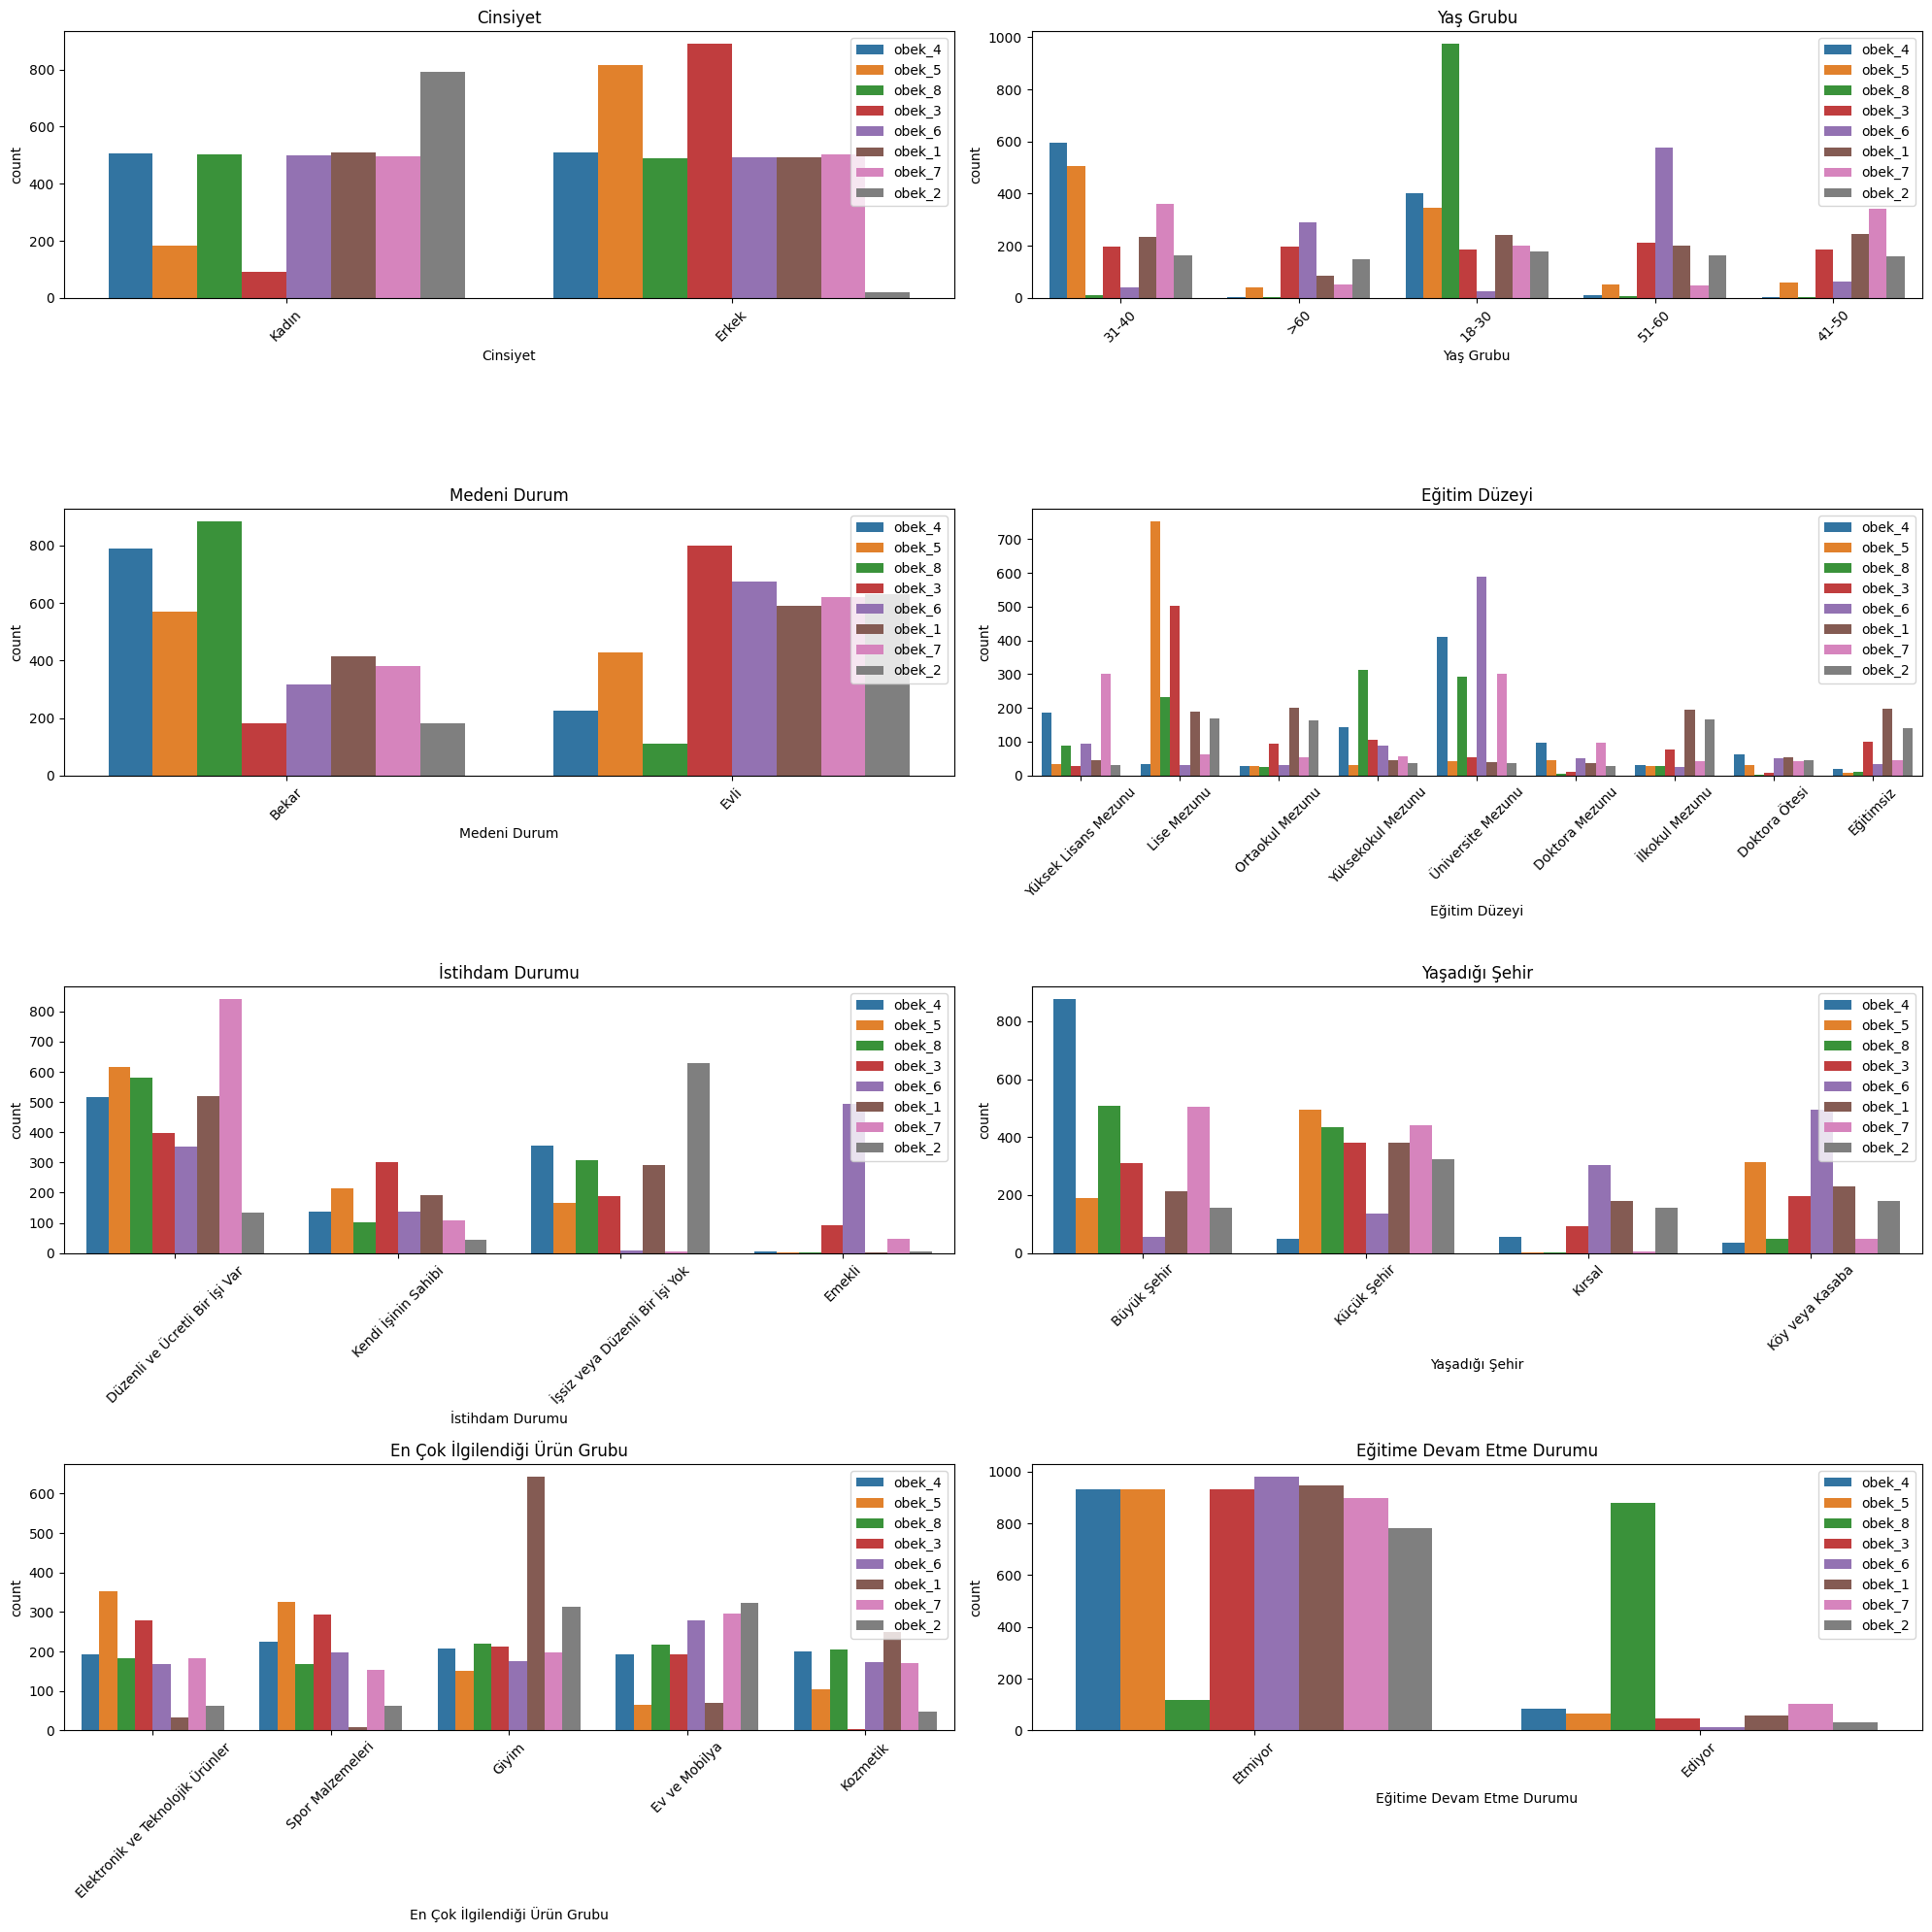

In [31]:
plt.figure(figsize=(20, 20))

n_rows = (len(categorical_features) + 1) // 2

data_for_visualizing= real_extended["Öbek İsmi"]

for idx, feature in enumerate(categorical_features, 1):
    plt.subplot(n_rows, 2, idx)
    sns.countplot(data=real_extended, x=feature, hue='Öbek İsmi')
    plt.title(feature)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [32]:
for col in train_df[numerical_features].columns:
    fig = px.box(real_extended,y=col, color="Öbek İsmi",title=("{} ve Öbek İsmi").format(col),width=800,height=600,)
    
    fig.show()

In [33]:
# Index kolonunu verilerimizden atıyoruz.
real_extended.drop(columns=['index'], inplace=True)

In [34]:
real_extended

Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0       Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1       Erkek       >60         Evli           Lise Mezunu   
2       Erkek     18-30        Bekar           Lise Mezunu   
3       Erkek     51-60         Evli           Lise Mezunu   
4       Erkek     31-40         Evli       Ortaokul Mezunu   
...       ...       ...          ...                   ...   
2335    Kadın     18-30        Bekar     Yüksekokul Mezunu   
2336    Kadın     31-40         Evli           Lise Mezunu   
2337    Erkek       >60         Evli  Yüksek Lisans Mezunu   
2338    Erkek     18-30         Evli         Doktora Ötesi   
2339    Erkek     51-60         Evli     Üniversite Mezunu   

                     İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0     Düzenli ve Ücretli Bir İşi Var          748266.440879      Büyük Şehir   
1                Kendi İşinin Sahibi          246298.609605      Küçük Şehir   
2     Düzenli ve Ücretli Bir İşi Var          268582.732360      Küçük Şehir   
3                Kendi İşinin Sahibi          327721.837865           Kırsal   
4     İşsiz veya Düzenli Bir İşi Yok          397431.626948      Büyük Şehir   
...                              ...                    ...              ...   
2335             Kendi İşinin Sahibi          259190.078834      Küçük Şehir   
2336  İşsiz veya Düzenli Bir İşi Yok          194580.563177           Kırsal   
2337  Düzenli ve Ücretli Bir İşi Var          357730.521969      Büyük Şehir   
2338  Düzenli ve Ücretli Bir İşi Var          213179.637202      Küçük Şehir   
2339  Düzenli ve Ücretli Bir İşi Var          519013.573683  Köy veya Kasaba   

         En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0     Elektronik ve Teknolojik Ürünler                        32010.900881   
1                     Spor Malzemeleri                         4145.729891   
2                                Giyim                         9924.379414   
3                                Giyim                         6417.780714   
4                                Giyim                         7886.663061   
...                                ...                                 ...   
2335                     Ev ve Mobilya                         9559.156534   
2336                     Ev ve Mobilya                         4070.232154   
2337                     Ev ve Mobilya                        22589.204381   
2338                  Spor Malzemeleri                         4205.390562   
2339  Elektronik ve Teknolojik Ürünler                        42675.353591   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                      37.310644                   Etmiyor   
1                                      11.554851                   Etmiyor   
2                                      55.353236                    Ediyor   
3                                      15.417239                   Etmiyor   
4                                      14.689837                   Etmiyor   
...                                          ...                       ...   
2335                                   41.883661                    Ediyor   
2336                                   20.082996                   Etmiyor   
2337                                   18.922305                   Etmiyor   
2338                                   10.758108                   Etmiyor   
2339                                   30.826534                    Ediyor   

     Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
0       obek_4                                102.936904  
1       obek_5                                 82.176053  
2       obek_8                                141.661426  
3       obek_3                                 17.097397  
4       obek_3                                 20.470459  
...        ...                                       ...  
2335    obek

# Veri Manipülasyonu

**real_extended içindeki obek_2 içerisindeki tüm 'Erkek' verileri kaldırdık**

In [35]:
real_extended = real_extended[(real_extended["Öbek İsmi"] != "obek_2") | (real_extended["Cinsiyet"] != "Erkek")]

**obek_8'deki yaş gruplarından sadece '18-30' yaş grubunu aldık çünkü diğer yaş gruplarında çok az var**

In [36]:
real_extended = real_extended[(real_extended["Öbek İsmi"] != "obek_8") | (real_extended["Yaş Grubu"] == "18-30")]

**obek_5'teki eğitimsizleri kaldırdık**

In [37]:
real_extended = real_extended[(real_extended["Öbek İsmi"] != "obek_5") | (real_extended["Eğitim Düzeyi"] != "Eğitimsiz")]

**obek_7'deki 'İstihdam Durumu' kolonunda 'Düzenli ve Ücretli Bir İşi Var'  ve 'Emekli' dışındaki hepisini kaldırdık**

In [38]:
real_extended = real_extended[(real_extended["Öbek İsmi"] != "obek_7") | ((real_extended["İstihdam Durumu"] == "Düzenli ve Ücretli Bir İşi Var") | (real_extended["İstihdam Durumu"] == "Emekli")| ((real_extended["İstihdam Durumu"] == "Kendi İşinin Sahibi")))]

**obek_1'deki en çok ilgilendiği ürün grubu 'Spor Malzemeleri' olanları kaldırdık**

In [39]:
real_extended = real_extended[(real_extended["Öbek İsmi"] != "obek_1") | (real_extended["En Çok İlgilendiği Ürün Grubu"] != "Spor Malzemeleri")]

**obek_3'teki en çok ilgilendiği ürün grubu 'kozmetik' olanları kaldırdık**

In [40]:
real_extended = real_extended[(real_extended["Öbek İsmi"] != "obek_3") | (real_extended["En Çok İlgilendiği Ürün Grubu"] != "Kozmetik")]

**'İstihdam Durumu' kolonundaki 'Emekli'ler içerisinden ve 'Yaş Grubu' kolonunda '18-30' ve '31-40' olan satırları kaldırdık**

In [41]:
real_extended = real_extended[((real_extended["İstihdam Durumu"] == "Emekli") & ~real_extended["Yaş Grubu"].isin(["18-30", "31-40"])) | (real_extended["İstihdam Durumu"] != "Emekli")]

**'Eğitime Devam Etme Durumu' sütununda 'Ediyor'lar içerisinden 'Yaş Grubu' sütununda '51-60' ve '41-50' olan satırları kaldırdık**

In [42]:
real_extended = real_extended[((real_extended["Eğitime Devam Etme Durumu"] == "Ediyor") & ~real_extended["Yaş Grubu"].isin(["51-60", "41-50"])) | (real_extended["Eğitime Devam Etme Durumu"] != "Ediyor")]

In [43]:
real_extended

Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0       Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1       Erkek       >60         Evli           Lise Mezunu   
2       Erkek     18-30        Bekar           Lise Mezunu   
3       Erkek     51-60         Evli           Lise Mezunu   
4       Erkek     31-40         Evli       Ortaokul Mezunu   
...       ...       ...          ...                   ...   
2334    Erkek     18-30        Bekar     Üniversite Mezunu   
2335    Kadın     18-30        Bekar     Yüksekokul Mezunu   
2336    Kadın     31-40         Evli           Lise Mezunu   
2337    Erkek       >60         Evli  Yüksek Lisans Mezunu   
2338    Erkek     18-30         Evli         Doktora Ötesi   

                     İstihdam Durumu  Yıllık Ortalama Gelir Yaşadığı Şehir  \
0     Düzenli ve Ücretli Bir İşi Var          748266.440879    Büyük Şehir   
1                Kendi İşinin Sahibi          246298.609605    Küçük Şehir   
2     Düzenli ve Ücretli Bir İşi Var          268582.732360    Küçük Şehir   
3                Kendi İşinin Sahibi          327721.837865         Kırsal   
4     İşsiz veya Düzenli Bir İşi Yok          397431.626948    Büyük Şehir   
...                              ...                    ...            ...   
2334  Düzenli ve Ücretli Bir İşi Var          347843.945344    Küçük Şehir   
2335             Kendi İşinin Sahibi          259190.078834    Küçük Şehir   
2336  İşsiz veya Düzenli Bir İşi Yok          194580.563177         Kırsal   
2337  Düzenli ve Ücretli Bir İşi Var          357730.521969    Büyük Şehir   
2338  Düzenli ve Ücretli Bir İşi Var          213179.637202    Küçük Şehir   

         En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0     Elektronik ve Teknolojik Ürünler                        32010.900881   
1                     Spor Malzemeleri                         4145.729891   
2                                Giyim                         9924.379414   
3                                Giyim                         6417.780714   
4                                Giyim                         7886.663061   
...                                ...                                 ...   
2334  Elektronik ve Teknolojik Ürünler                        25387.097242   
2335                     Ev ve Mobilya                         9559.156534   
2336                     Ev ve Mobilya                         4070.232154   
2337                     Ev ve Mobilya                        22589.204381   
2338                  Spor Malzemeleri                         4205.390562   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                      37.310644                   Etmiyor   
1                                      11.554851                   Etmiyor   
2                                      55.353236                    Ediyor   
3                                      15.417239                   Etmiyor   
4                                      14.689837                   Etmiyor   
...                                          ...                       ...   
2334                                   18.097809                   Etmiyor   
2335                                   41.883661                    Ediyor   
2336                                   20.082996                   Etmiyor   
2337                                   18.922305                   Etmiyor   
2338                                   10.758108                   Etmiyor   

     Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
0       obek_4                                102.936904  
1       obek_5                                 82.176053  
2       obek_8                                141.661426  
3       obek_3                                 17.097397  
4       obek_3                                 20.470459  
...        ...                                       ...  
2334    obek_7                      

**Veri temizliği sonrası 7539 satır verimiz kaldı**

`real_extended` veri seti için label encoding işlemi

In [44]:
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    real_extended[column] = le.fit_transform(real_extended[column])
    label_encoders[column] = le

In [45]:
target_encoder = LabelEncoder()
real_extended['Öbek İsmi'] = target_encoder.fit_transform(real_extended['Öbek İsmi'])

real_extended

Cinsiyet  Yaş Grubu  Medeni Durum  Eğitim Düzeyi  İstihdam Durumu  \
0            1          1             0              5                0   
1            0          4             1              3                2   
2            0          0             0              3                0   
3            0          3             1              3                2   
4            0          1             1              4                3   
...        ...        ...           ...            ...              ...   
2334         0          0             0              7                0   
2335         1          0             0              6                2   
2336         1          1             1              3                3   
2337         0          4             1              5                0   
2338         0          0             1              1                0   

      Yıllık Ortalama Gelir  Yaşadığı Şehir  En Çok İlgilendiği Ürün Grubu  \
0             748266.440879               0                              0   
1             246298.609605               2                              4   
2             268582.732360               2                              2   
3             327721.837865               3                              2   
4             397431.626948               0                              2   
...                     ...             ...                            ...   
2334          347843.945344               2                              0   
2335          259190.078834               2                              1   
2336          194580.563177               3                              1   
2337          357730.521969               0                              1   
2338          213179.637202               2                              4   

      Yıllık Ortalama Satın Alım Miktarı  \
0                           32010.900881   
1                            4145.729891   
2                            9924.379414   
3                            6417.780714   
4                            7886.663061   
...                                  ...   
2334                        25387.097242   
2335                         9559.156534   
2336                         4070.232154   
2337                        22589.204381   
2338                         4205.390562   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi  Eğitime Devam Etme Durumu  \
0                                      37.310644                          1   
1                                      11.554851                          1   
2                                      55.353236                          0   
3                                      15.417239                          1   
4                                      14.689837                          1   
...                                          ...                        ...   
2334                                   18.097809                          1   
2335                                   41.883661                          0   
2336                                   20.082996                          1   
2337                                   18.922305                          1   
2338                                   10.758108                          1   

      Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
0             3                                102.936904  
1             4                                 82.176053  
2             7                                141.661426  
3             2                                 17.097397  
4             2                                 20.470459  
...         ...                                       ...  
2334          6                                120.476257  
2335          7                                117.627785  
2336          1                                 45.659622  
2337          6                                100.691379  
2338          4               

`real_extended` dataframeinin kolonları arasındaki ilişkiyi inceleyebilmek için 'Öbek İsmi' kolonu çıkarılmış olan 'obeksiz' dataframeinin korelasyon grafiğini oluşturduk.

<AxesSubplot:>

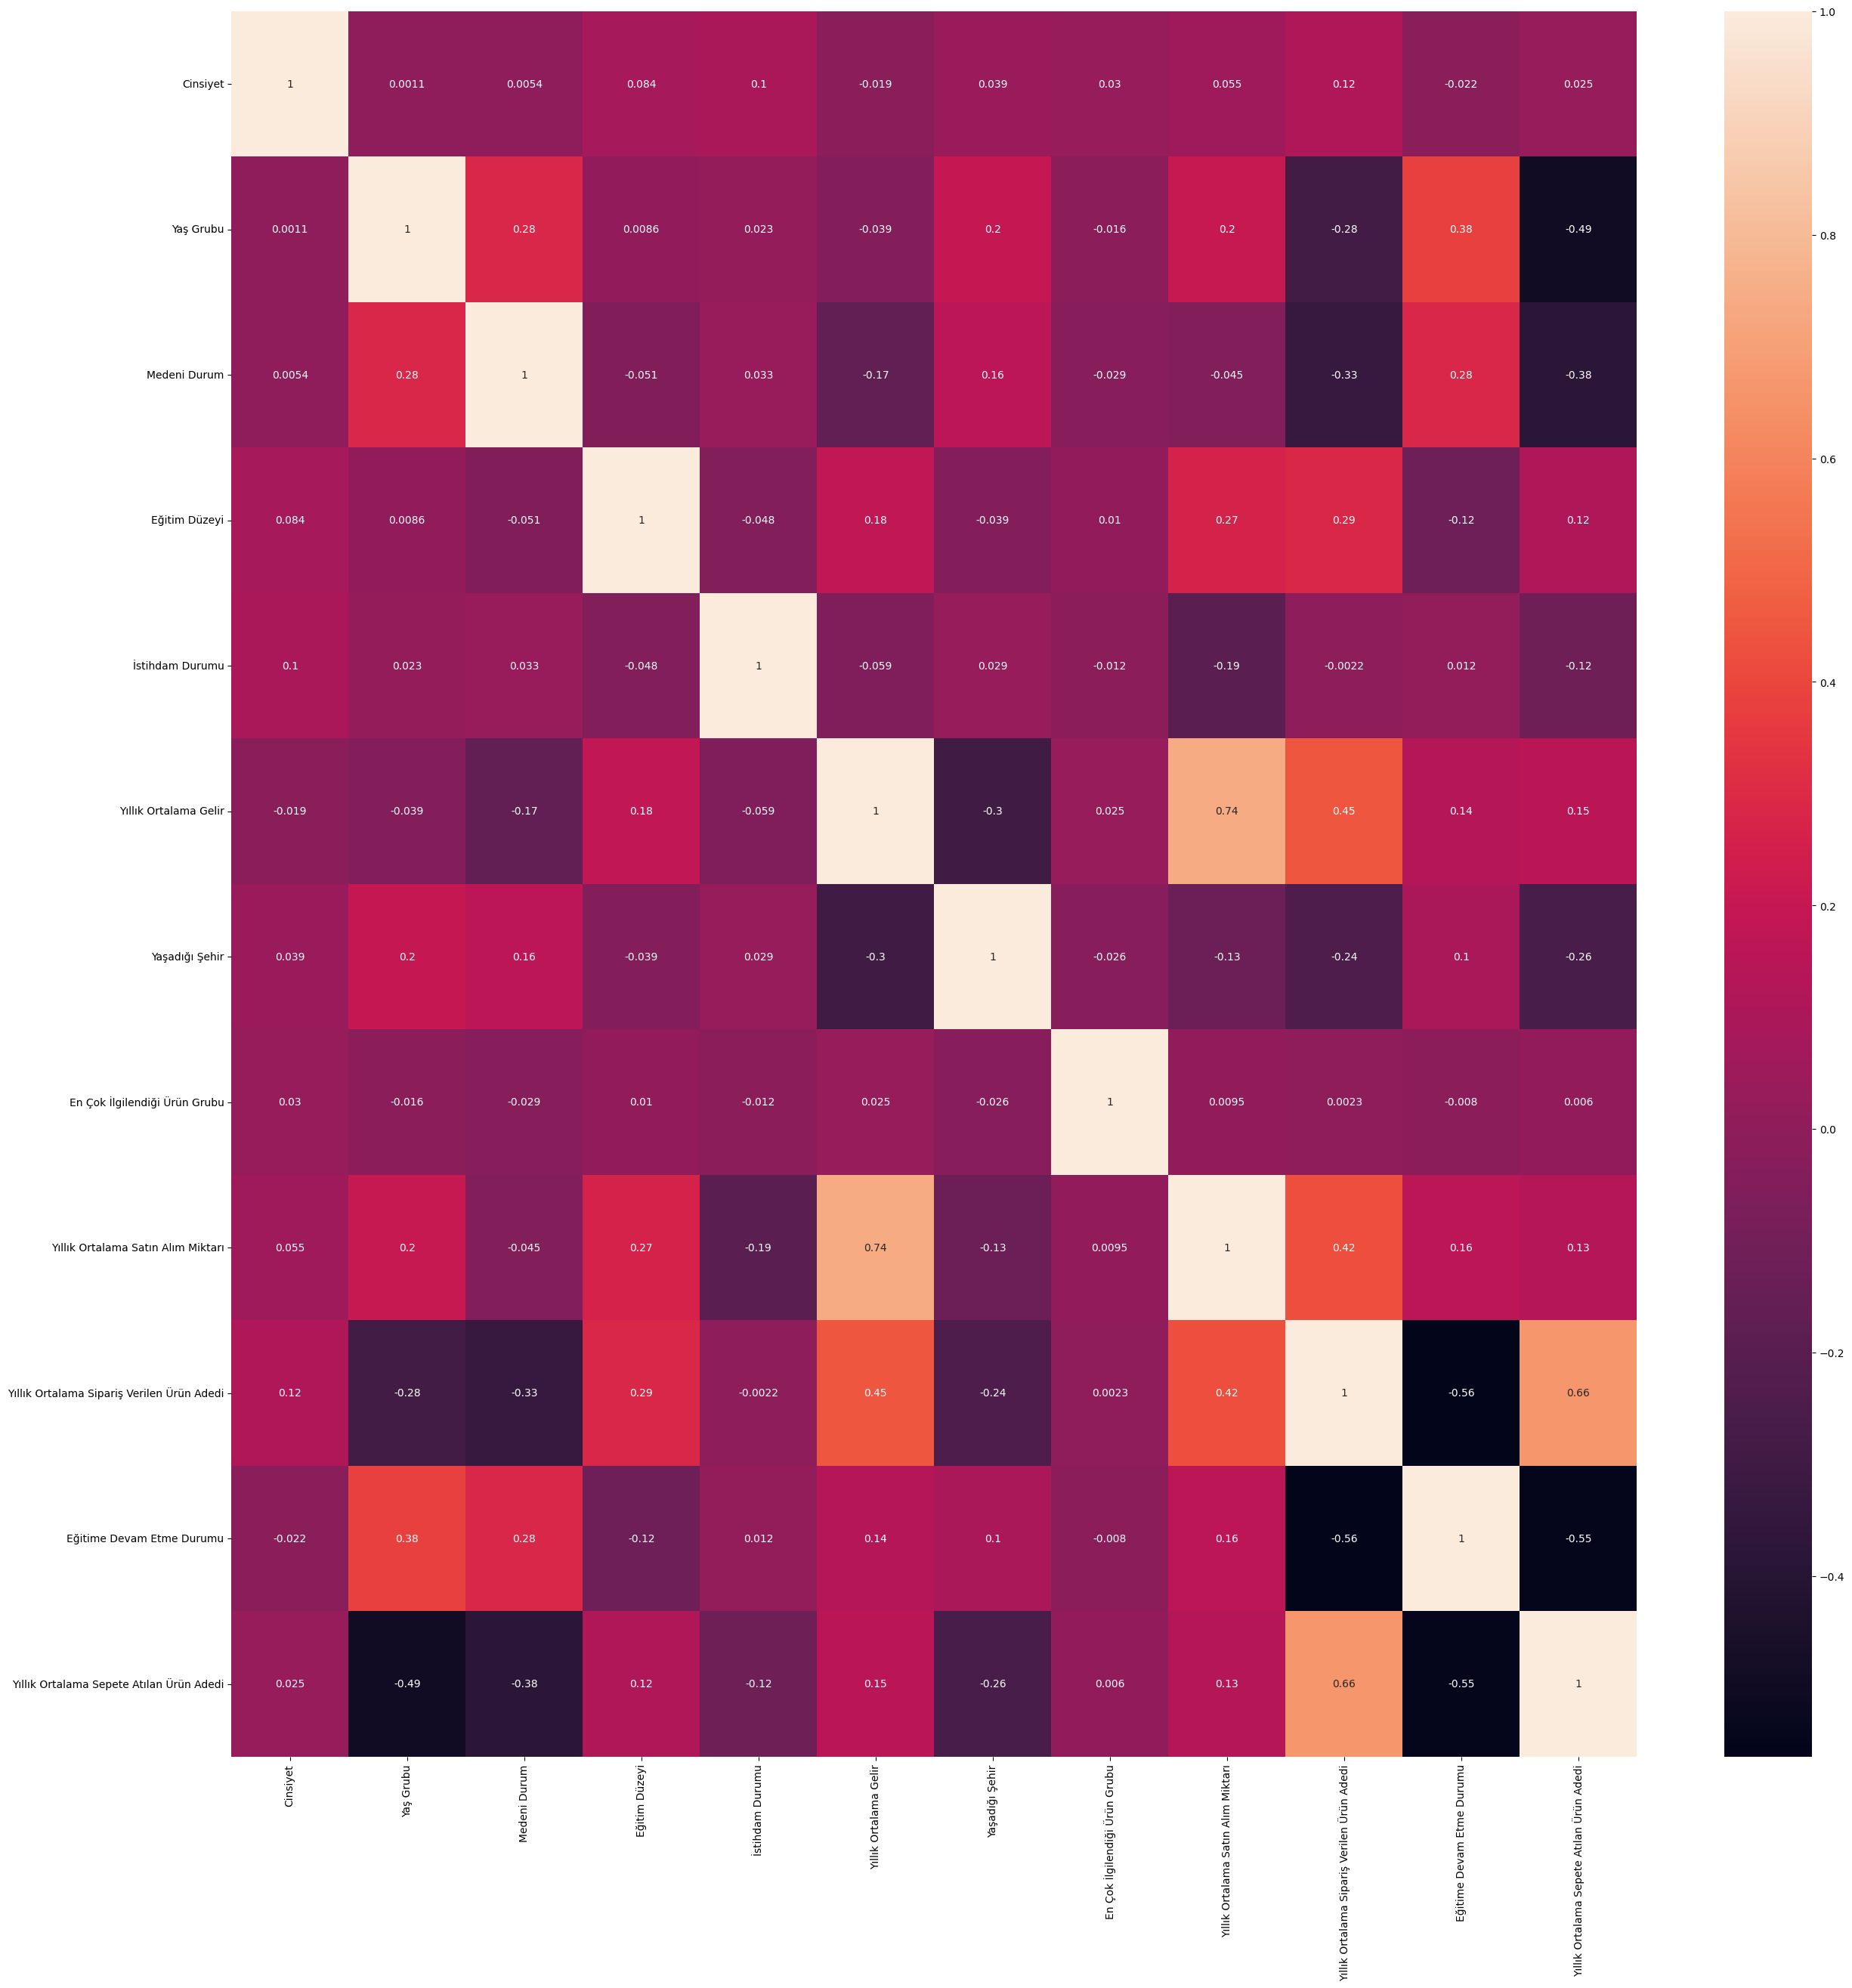

In [46]:
obeksiz = real_extended.drop("Öbek İsmi", axis=1)
plt.figure(figsize=(30, 30))
sns.heatmap(obeksiz.corr(), annot=True)

Korelasyon Grafiğini incelediğimizde 0.74 ile en yüksek uyumun "Yıllık Ortalama Gelir" ile "Yıllık Ortalama Satın Alım Miktarı" arasında olduğu görülmekte bu yüzden bu 'real_extended' veri setimizde ve 'test_df' veri setimizdeki bu iki kolonu birbirine oranlayarak "Yıllık Harcama Oranı" isminde yeni bir kolon oluşturduk. 


In [47]:
real_extended["Yıllık Harcama Oranı"] = real_extended["Yıllık Ortalama Gelir"] / real_extended["Yıllık Ortalama Satın Alım Miktarı"]
test_df["Yıllık Harcama Oranı"] = test_df["Yıllık Ortalama Gelir"] / test_df["Yıllık Ortalama Satın Alım Miktarı"]
real_extended

Cinsiyet  Yaş Grubu  Medeni Durum  Eğitim Düzeyi  İstihdam Durumu  \
0            1          1             0              5                0   
1            0          4             1              3                2   
2            0          0             0              3                0   
3            0          3             1              3                2   
4            0          1             1              4                3   
...        ...        ...           ...            ...              ...   
2334         0          0             0              7                0   
2335         1          0             0              6                2   
2336         1          1             1              3                3   
2337         0          4             1              5                0   
2338         0          0             1              1                0   

      Yıllık Ortalama Gelir  Yaşadığı Şehir  En Çok İlgilendiği Ürün Grubu  \
0             748266.440879               0                              0   
1             246298.609605               2                              4   
2             268582.732360               2                              2   
3             327721.837865               3                              2   
4             397431.626948               0                              2   
...                     ...             ...                            ...   
2334          347843.945344               2                              0   
2335          259190.078834               2                              1   
2336          194580.563177               3                              1   
2337          357730.521969               0                              1   
2338          213179.637202               2                              4   

      Yıllık Ortalama Satın Alım Miktarı  \
0                           32010.900881   
1                            4145.729891   
2                            9924.379414   
3                            6417.780714   
4                            7886.663061   
...                                  ...   
2334                        25387.097242   
2335                         9559.156534   
2336                         4070.232154   
2337                        22589.204381   
2338                         4205.390562   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi  Eğitime Devam Etme Durumu  \
0                                      37.310644                          1   
1                                      11.554851                          1   
2                                      55.353236                          0   
3                                      15.417239                          1   
4                                      14.689837                          1   
...                                          ...                        ...   
2334                                   18.097809                          1   
2335                                   41.883661                          0   
2336                                   20.082996                          1   
2337                                   18.922305                          1   
2338                                   10.758108                          1   

      Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  \
0             3                                102.936904   
1             4                                 82.176053   
2             7                                141.661426   
3             2                                 17.097397   
4             2                                 20.470459   
...         ...                                       ...   
2334          6                                120.476257   
2335          7                                117.627785   
2336          1                                 45.659622   
2337          6                                100.691379   
2338          4    

**MODEL EĞİTİMİ**

`train_test_split` kullanarak veriyi eğitim ve test setlerine ayırdık. Eğitim verimizi %66, test verimizi %33 olarak belirledik. `StandardScaler` kullanarak verimizi belirli bi oranda ölçeklendirdik.

In [48]:
X = real_extended.drop('Öbek İsmi', axis=1)
y = real_extended['Öbek İsmi']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=2)

In [49]:
test_data_scaled = scaler.transform(test_df)

**LightGBM**, **RandomForestClassifier**, **K-means** ve **Derin öğrenme** modelleri kullanarak yaptığımız denemeler sonucunda en iyi sonucu ***RandomForestClassifier*** kullanarak elde ettik.  ***RandomForestClassifier*** modelinde, birden fazla ağaç eğitilir ve sonuçlar ortak bir tahmin olarak birleştirilir.

**n_estimators=100**: 100 karar ağacı oluşturduk.

Model, **X_train** (eğitim özellikleri) ve **y_train** (eğitim hedef değişkeni) verilerini kullanarak eğittik.

**'accuracy_score'** fonksiyonu ile gerçek hedef değerlerle tahmin edilen değerler arasındaki doğruluk oranını hesapladık.

**'classification_report'** fonksiyonu, sınıflandırma sonuçlarını ayrıntılı bir rapor olarak oluşturduk.

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


clf = RandomForestClassifier(random_state=13, n_estimators=500, max_depth=8)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_encoder.classes_)

print(f'Doğruluk oranı: {accuracy}')
print(classification_rep)

Doğruluk oranı: 0.9782958199356914
              precision    recall  f1-score   support

      obek_1       0.98      0.98      0.98       333
      obek_2       0.98      0.98      0.98       262
      obek_3       0.98      0.98      0.98       323
      obek_4       0.99      0.94      0.97       337
      obek_5       0.98      0.99      0.98       310
      obek_6       0.97      0.98      0.98       314
      obek_7       0.97      0.98      0.98       304
      obek_8       0.97      1.00      0.98       305

    accuracy                           0.98      2488
   macro avg       0.98      0.98      0.98      2488
weighted avg       0.98      0.98      0.98      2488



In [51]:
test_predictions = clf.predict(test_data_scaled)
test_predictions_labels = target_encoder.inverse_transform(test_predictions)

**Elde ettiğimiz modelin tahminlerine göre "submission2.csv" dosyasını oluşturduk.**

In [52]:
submission_df = pd.DataFrame(
    {'id': submission_ids, 'Öbek İsmi': test_predictions_labels})
submission_df.to_csv('submission2.csv', index=False)